## Adani Enterprise Alpha BackTest 2018


In [1]:
import pandas as pd
from matplotlib.pyplot import plot
from statistics import *
import sys
sys.path.insert(1,"../../")
from AlphaTests import *

In [2]:
stock = "ADANIENT"
# options = ["%s-options-PE-1.csv"%(stock),
#           "%s-options-PE-2.csv"%(stock),
#           "%s-options-PE-3.csv"%(stock),
#           "%s-options-PE-4.csv"%(stock),
#           "%s-options-PE-5.csv"%(stock),
#           "%s-options-PE-6.csv"%(stock),]

options = []
prices = []

for i in range(12):
    options.append("%s-options-PE-%s.csv"%(stock,str(i+1)))
    prices.append("%s-prices-%s.csv"%(stock,str(i+1)))

# prices = ["%s-prices-1.csv"%(stock),
#           "%s-prices-2.csv"%(stock),
#           "%s-prices-3.csv"%(stock),
#           "%s-prices-4.csv"%(stock),
#           "%s-prices-5.csv"%(stock),
#           "%s-prices-6.csv"%(stock),]

for i in prices:
    df = pd.read_csv(i)
    df["Close"] = df["Close Price"]
    df["Open"] = df["Open Price"]
    df.to_csv(i)

In [3]:
loader = Loader(options,prices)

In [7]:
loader.find_individual_optimal_threshold()

Mean Threshold : 0.993333


[0.7200000000000003,
 0.4500000000000001,
 0.32,
 0.9800000000000005,
 1.3900000000000008,
 1.9600000000000013,
 1.1000000000000005,
 1.510000000000001,
 0.7700000000000004,
 0,
 1.9500000000000013,
 0.7700000000000004]

In [8]:
loader.maximize_returns()

[0.7200000000000003,
 673.3846574397937,
 -10,
 267.37573552166293,
 940.7603929614567]

In [9]:
loader.minimize_losses()

[0.31, 38.03571428571429, -10, 60.0, 98.03571428571429]

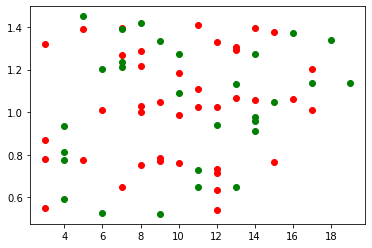

In [12]:
test_thresh = 0.5
loader.plot_scatter(test_thresh,limit=1.5)

In [7]:
loader.find_net_returns(0.31)

38.03571428571429

In [12]:
options_df = []
for i in options:
    tmp = pd.read_csv(i)
    options_df.append(tmp)
    
prices_df = []
for i in prices:
    tmp = pd.read_csv(i)
    prices_df.append(tmp)
    

In [13]:
df = pd.concat(options_df)
df2 = pd.concat(prices_df)
df["Alpha"] = (df2["Close"] - df["Strike Price"]) / df["Close"]
# options["Alpha-Prev"] = options.Alpha.shift(1)
df["Alpha-Change"] = ((df["Alpha"] - df.Alpha.shift(1)) / df["Alpha"])*100
df["Alpha-Mean"] = (df.Alpha.shift(1)+df.Alpha.shift(2)+df.Alpha.shift(3)) / 3
df["Change"] = ((df["Close"] - df["Open"]) / df["Open"])*100
df["Ratio"] = df["Alpha"] / df["Alpha-Mean"]

In [30]:
# df.to_csv("main-options-pe.csv")

In [14]:
for index,rows in df.iterrows():
    print(rows["Alpha"],rows["Alpha-Mean"])

0.8904128761371548 nan
0.8853553199842952 nan
0.8454292158683787 nan
1.3690440958863528 0.8737324706632762
2.1471637531216503 1.0332762105796756
2.705482192877145 1.4538790216254605
2.845936109987866 2.0738966806283825
2.361966711306674 2.5661940186622205
2.729300020648364 2.6377950047238947
3.4257946489823885 2.6457342806476345
6.906976744186051 2.839020460312476
6.0628109452736405 4.354023804605601
12.744438952051393 5.465194112814026
20.109875735775034 8.571408880503695
38.228228228228225 12.972375211033357
38.65909090909093 23.694180972018216
53.54087346024633 32.332398291031396
60.26507537688441 43.4760641991885
67.74653739612192 50.82167991540722
80.20706260032105 60.51749541108422
82.51090909090907 69.40622512444246
100.61099365750532 76.82150302911735
89.72525252525256 87.77632178291181
15.404989384288763 90.94905175788898
8.793517406962785 68.58041185568221
3.056319457524955 37.9745864388347
2.355422745649499 9.084942082925501
5.841687817258893 4.735086536712413
1.581613508442

In [11]:
df2.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Date,Open,High,...,Close,Shares Traded,Turnover (Rs. Cr),Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-Apr-2018,24833.2,25064.0,...,NaN,NaN,NaN,27-Dec-2018,27200.65,27239.95,26845.1,26878.55,169903194.0,4347.66
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df = pd.read_csv(options[-1])

In [48]:
df["Alpha"] = (df["Close"] - df["Strike Price"]) / df["Close"]
# options["Alpha-Prev"] = options.Alpha.shift(1)
df["Alpha-Change"] = ((df["Alpha"] - df.Alpha.shift(1)) / df["Alpha"])*100
df["Alpha-Mean"] = (df.Alpha.shift(1)+df.Alpha.shift(2)+df.Alpha.shift(3)) / 3
df["Change"] = ((df["Close"] - df["Open"]) / df["Open"])*100
df["Ratio"] = df["Alpha"] / df["Alpha-Mean"]

In [49]:
df.tail()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,...,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value,Alpha,Alpha-Change,Alpha-Mean,Change,Ratio
33,BANKNIFTY,20-Dec-2018,27-Dec-2018,PE,25000,4.0,5.20,3.55,4.00,3.55,...,39271.50,6.50,311760,71120,-,-6249.000000,25.930075,-4287.307916,0.000000,1.457558
34,BANKNIFTY,21-Dec-2018,27-Dec-2018,PE,25000,4.1,7.45,3.00,4.60,4.70,...,110015.58,20.58,305900,-5860,-,-5433.782609,-15.002761,-5259.530138,12.195122,1.033131
35,BANKNIFTY,24-Dec-2018,27-Dec-2018,PE,25000,2.5,3.35,1.50,1.95,2.40,...,65885.19,5.19,200800,-105100,-,-12819.512821,57.613189,-5437.137413,-22.000000,2.357769
36,BANKNIFTY,26-Dec-2018,27-Dec-2018,PE,25000,1.9,3.00,0.55,1.20,0.55,...,36902.32,2.32,176560,-24240,26986.8,-20832.333333,38.463385,-8167.431810,-36.842105,2.550659
37,BANKNIFTY,27-Dec-2018,27-Dec-2018,PE,25000,0.9,0.90,0.05,0.10,0.10,...,12000.05,0.05,165980,-10580,-,-249999.000000,91.667033,-13028.542921,-88.888889,19.188562


In [15]:
for index,rows in df.iterrows():
    print(rows["Date"])
    print(rows["Alpha"] / rows["Alpha-Mean"])
    print(rows["Ratio"])
    print("-------------------------------")

01-Jan-2018
nan
nan
-------------------------------
02-Jan-2018
nan
nan
-------------------------------
03-Jan-2018
nan
nan
-------------------------------
04-Jan-2018
1.566891630852486
1.566891630852486
-------------------------------
05-Jan-2018
2.078015279106325
2.078015279106325
-------------------------------
08-Jan-2018
1.8608716080464327
1.8608716080464327
-------------------------------
09-Jan-2018
1.3722651357566948
1.3722651357566948
-------------------------------
10-Jan-2018
0.9204162639806899
0.9204162639806899
-------------------------------
11-Jan-2018
1.0346899648231185
1.0346899648231185
-------------------------------
12-Jan-2018
1.2948370038671486
1.2948370038671486
-------------------------------
15-Jan-2018
2.4328731831069077
2.4328731831069077
-------------------------------
16-Jan-2018
1.3924615981337811
1.3924615981337811
-------------------------------
17-Jan-2018
2.331927958820348
2.331927958820348
-------------------------------
18-Jan-2018
2.346157558941849
